TO ANALYSE THE JOB MARKET AND AUTOMATION RISK

In [97]:
#importing all the models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

from sklearn.metrics import classification_report , confusion_matrix, accuracy_score , r2_score , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

LOADING DATA SET FOR AUTOMATION AND SALARY

In [98]:
df_risk = pd.read_csv(r"C:\Users\mansi\OneDrive\Desktop\project_domain_applications\automation_data_by_state.csv" ,encoding="latin1")
df_risk.head(5)


,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


In [99]:
df_sal = pd.read_excel(r"C:\Users\mansi\OneDrive\Desktop\project_domain_applications\occupation_salary.xlsx")
df_sal.head(5)



,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,NaN,NaN
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,NaN,NaN
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN


PREPROCESSING DATASET 

In [100]:
print("shape of df set: ", df_risk.shape)
print("columns of df set:" , df_risk.columns)
print("shape of data set: ", df_sal.shape)
print("columns of data set:" , df_sal.columns)

shape of df set:  (702, 54)
columns of df set: Index(['SOC', 'Occupation', 'Probability', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')
shape of data set:  (1394, 20)
columns of data set: Index(['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
       'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 

In [101]:
df_sal.head(5)

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#,NaN,NaN
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#,NaN,NaN
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#,NaN,NaN


In [102]:
# List of percentile columns to drop
percentile_cols = [
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Drop columns from merged dataframe
df_sal = df_sal.drop(columns=percentile_cols , axis = 0)

# Optional: check remaining columns
print(df_sal.columns)


Index(['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
       'A_MEAN', 'MEAN_PRSE', 'ANNUAL', 'HOURLY'],
      dtype='object')


In [103]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OCC_CODE   1394 non-null   object 
 1   OCC_TITLE  1394 non-null   object 
 2   OCC_GROUP  1394 non-null   object 
 3   TOT_EMP    1394 non-null   int64  
 4   EMP_PRSE   1394 non-null   float64
 5   H_MEAN     1394 non-null   object 
 6   A_MEAN     1394 non-null   object 
 7   MEAN_PRSE  1394 non-null   float64
 8   ANNUAL     82 non-null     object 
 9   HOURLY     6 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 109.0+ KB


In [104]:
# Check nulls
print(df_risk.isnull().sum())


SOC                     0
Occupation              0
Probability             0
Alabama                 0
Alaska                  0
Arizona                 0
Arkansas                0
California              0
Colorado                0
Connecticut             0
Delaware                0
District of Columbia    0
Florida                 0
Georgia                 0
Hawaii                  0
Idaho                   0
Illinois                0
Indiana                 0
Iowa                    0
Kansas                  0
Kentucky                0
Louisiana               0
Maine                   0
Maryland                0
Massachusetts           0
Michigan                0
Minnesota               0
Mississippi             0
Missouri                0
Montana                 0
Nebraska                0
Nevada                  0
New Hampshire           0
New Jersey              0
New Mexico              0
New York                0
North Carolina          0
North Dakota            0
Ohio        

In [105]:
# Percentage of nulls
print(df_risk.isnull().mean() * 100)

SOC                     0.0
Occupation              0.0
Probability             0.0
Alabama                 0.0
Alaska                  0.0
Arizona                 0.0
Arkansas                0.0
California              0.0
Colorado                0.0
Connecticut             0.0
Delaware                0.0
District of Columbia    0.0
Florida                 0.0
Georgia                 0.0
Hawaii                  0.0
Idaho                   0.0
Illinois                0.0
Indiana                 0.0
Iowa                    0.0
Kansas                  0.0
Kentucky                0.0
Louisiana               0.0
Maine                   0.0
Maryland                0.0
Massachusetts           0.0
Michigan                0.0
Minnesota               0.0
Mississippi             0.0
Missouri                0.0
Montana                 0.0
Nebraska                0.0
Nevada                  0.0
New Hampshire           0.0
New Jersey              0.0
New Mexico              0.0
New York            

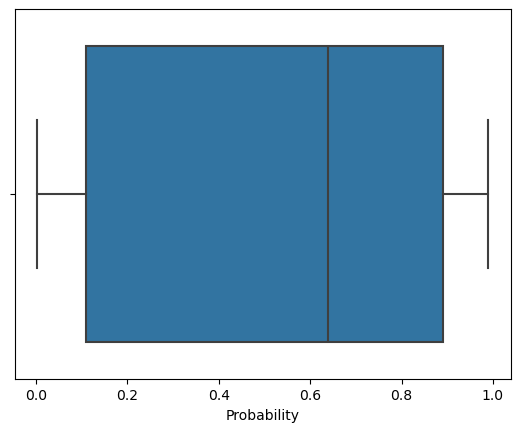

In [106]:
# Check distribution of Probability
sns.boxplot(x=df_risk['Probability'])
plt.show()



In [107]:
# Option 1: Keep only Probability
df_risk_clean = df_risk[['SOC', 'Probability']]

In [108]:


# Option 2: Include mean state-level risk
state_cols = df_risk.columns[3:]
df_risk['Mean_State_Risk'] = df_risk[state_cols].mean(axis=1)
df_risk_clean = df_risk[['SOC', 'Probability', 'Mean_State_Risk']]


In [109]:
state_cols = df_risk.columns[3:]  # Alabama → Wyoming
df_risk['Mean_State_Risk'] = df_risk[state_cols].mean(axis=1)

# Keep only essential columns
df_risk_clean = df_risk[['SOC', 'Probability', 'Mean_State_Risk']]


In [110]:
# Normalize state-level risk columns
scaler = MinMaxScaler()
df_risk[state_cols] = scaler.fit_transform(df_risk[state_cols])

# Compute mean normalized risk
df_risk['Mean_State_Risk_Norm'] = df_risk[state_cols].mean(axis=1)

# Keep relevant columns
df_risk_clean = df_risk[['SOC', 'Probability', 'Mean_State_Risk_Norm']]

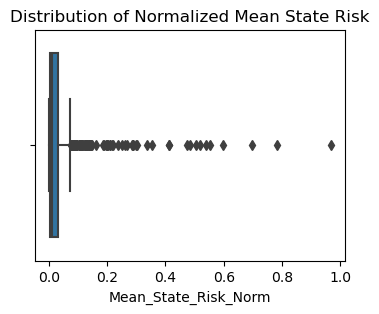

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


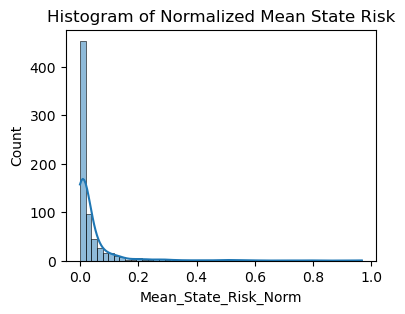

In [111]:

# Boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df_risk['Mean_State_Risk_Norm'])
plt.title('Distribution of Normalized Mean State Risk')
plt.show()

# Histogram
plt.figure(figsize=(4,3))
sns.histplot(df_risk['Mean_State_Risk_Norm'], bins=50, kde=True)
plt.title('Histogram of Normalized Mean State Risk')
plt.show()


In [112]:


df_risk['Mean_State_Risk_Log'] = np.log1p(df_risk['Mean_State_Risk_Norm'])


In [113]:
merged_df = df_sal.merge(df_risk_clean, left_on='OCC_CODE', right_on='SOC', how='left')


In [114]:
print(merged_df.columns)


Index(['OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'H_MEAN',
       'A_MEAN', 'MEAN_PRSE', 'ANNUAL', 'HOURLY', 'SOC', 'Probability',
       'Mean_State_Risk_Norm'],
      dtype='object')


In [115]:
# Keep only rows that have matching risk data
merged_df_matched = merged_df.dropna(subset=['Probability']).copy()

print(f"Number of rows after keeping only matched SOC codes: {len(merged_df_matched)}")


Number of rows after keeping only matched SOC codes: 688


In [116]:
merged_df_matched = merged_df.drop(columns=['SOC'])
merged_df_matched['Mean_State_Risk_Log'] = np.log1p(merged_df_matched['Mean_State_Risk_Norm'])


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


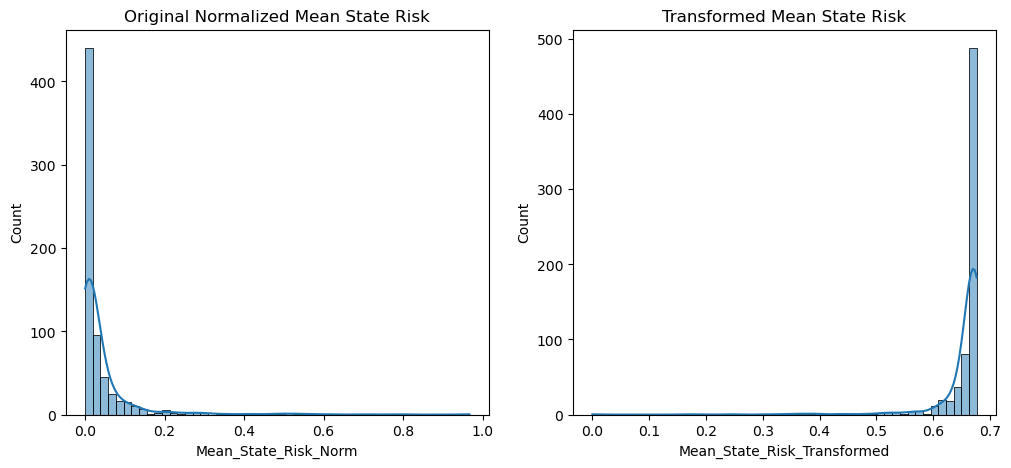

In [117]:
# Mirror the data to apply log1p
max_risk = merged_df_matched['Mean_State_Risk_Norm'].max()
merged_df_matched['Mean_State_Risk_Transformed'] = np.log1p(max_risk - merged_df_matched['Mean_State_Risk_Norm'])

# Check new distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(merged_df_matched['Mean_State_Risk_Norm'], bins=50, kde=True)
plt.title('Original Normalized Mean State Risk')

plt.subplot(1,2,2)
sns.histplot(merged_df_matched['Mean_State_Risk_Transformed'], bins=50, kde=True)
plt.title('Transformed Mean State Risk')

plt.show()


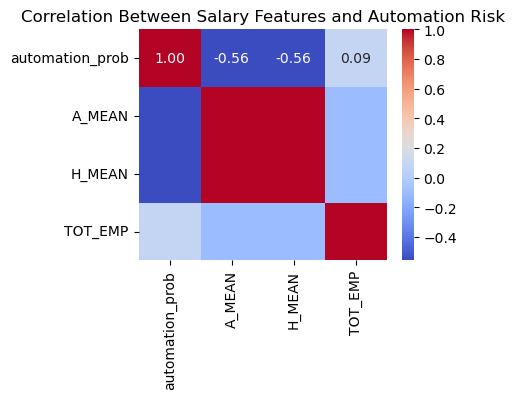

In [118]:
# Convert data types
merged_df['A_MEAN'] = pd.to_numeric(merged_df['A_MEAN'], errors='coerce')
merged_df['H_MEAN'] = pd.to_numeric(merged_df['H_MEAN'], errors='coerce')
merged_df['automation_prob'] = pd.to_numeric(merged_df['Probability'], errors='coerce')

# Drop missing values
merged_df = merged_df.dropna(subset=['A_MEAN', 'H_MEAN', 'automation_prob'])

# Correlation heatmap
plt.figure(figsize=(4,3))
corr_matrix = merged_df[['automation_prob', 'A_MEAN', 'H_MEAN', 'TOT_EMP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Salary Features and Automation Risk")
plt.show()


Shows which job categories are most at risk.

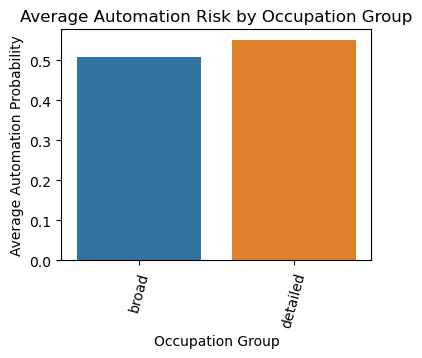

In [119]:
plt.figure(figsize=(4,3))
group_risk = merged_df.groupby('OCC_GROUP')['automation_prob'].mean().sort_values()
sns.barplot(x=group_risk.index, y=group_risk.values)
plt.xticks(rotation=75)
plt.title("Average Automation Risk by Occupation Group")
plt.xlabel("Occupation Group")
plt.ylabel("Average Automation Probability")
plt.show()


Proves low-salary jobs → high automation risk.

In [120]:
for col in merged_df_matched.columns:
    print(repr(col))


'OCC_CODE'
'OCC_TITLE'
'OCC_GROUP'
'TOT_EMP'
'EMP_PRSE'
'H_MEAN'
'A_MEAN'
'MEAN_PRSE'
'ANNUAL'
'HOURLY'
'Probability'
'Mean_State_Risk_Norm'
'Mean_State_Risk_Log'
'Mean_State_Risk_Transformed'


In [121]:
# Define bins for Low, Medium, High risk
bins = [0, 0.33, 0.66, 1]        # you can adjust thresholds
labels = ['Low', 'Medium', 'High']

# Create the new column
merged_df['risk_category'] = pd.cut(merged_df['automation_prob'], bins=bins, labels=labels)

# Check that it was created correctly
print(merged_df[['automation_prob', 'risk_category']].head())


    automation_prob risk_category
4             0.015           Low
6             0.160           Low
11            0.039           Low
13            0.014           Low
14            0.013           Low


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


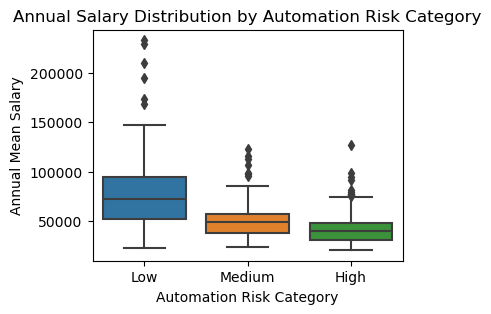

In [122]:
plt.figure(figsize=(4,3))
sns.boxplot(data=merged_df, x='risk_category', y='A_MEAN')
plt.title("Annual Salary Distribution by Automation Risk Category")
plt.xlabel("Automation Risk Category")
plt.ylabel("Annual Mean Salary")
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_7100\338572511.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_by_risk = merged_df.groupby('risk_category')['TOT_EMP'].sum()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


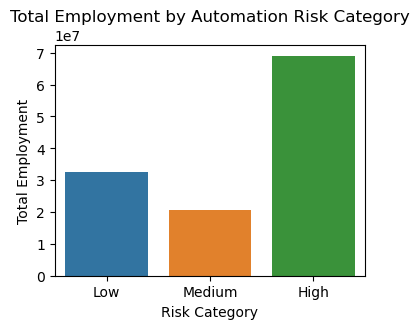

In [123]:
#Shows how many workers are in high-risk jobs.
plt.figure(figsize=(4,3))
emp_by_risk = merged_df.groupby('risk_category')['TOT_EMP'].sum()

sns.barplot(x=emp_by_risk.index, y=emp_by_risk.values)
plt.title("Total Employment by Automation Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Total Employment")
plt.show()


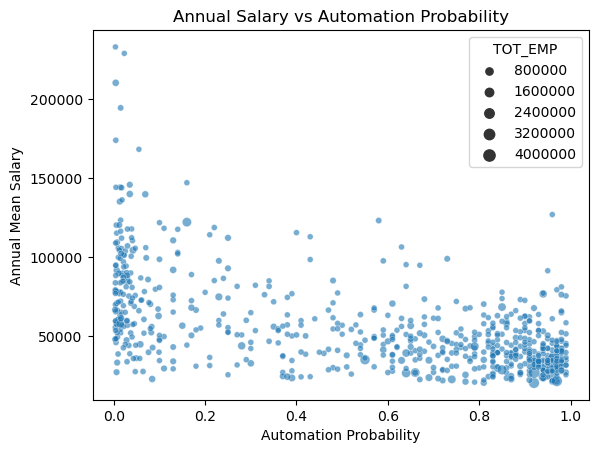

In [124]:
sns.scatterplot(x='automation_prob', y='A_MEAN', size='TOT_EMP', data=merged_df, alpha=0.6)
plt.title("Annual Salary vs Automation Probability")
plt.xlabel("Automation Probability")
plt.ylabel("Annual Mean Salary")
plt.show()


In [125]:

from sklearn.preprocessing import OneHotEncoder
X_numeric = merged_df_matched[['TOT_EMP', 'EMP_PRSE', 'H_MEAN', 'A_MEAN', 'Mean_State_Risk_Transformed']]
# One-hot encode OCC_GROUP
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
occ_group_encoded = ohe.fit_transform(merged_df[['OCC_GROUP']])
occ_group_df = pd.DataFrame(occ_group_encoded, columns=ohe.get_feature_names_out(['OCC_GROUP']))

# Combine numeric + encoded categorical features
X_final = pd.concat([X_numeric.reset_index(drop=True), occ_group_df.reset_index(drop=True)], axis=1)




In [126]:


# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=100)  # limit to top 100 words for simplicity

# Fit and transform OCC_TITLE
title_tfidf = tfidf.fit_transform(merged_df['OCC_TITLE'])

# Convert sparse matrix to DataFrame
title_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Combine with existing features
X_final = pd.concat([X_final.reset_index(drop=True), title_df.reset_index(drop=True)], axis=1)


In [127]:
y = merged_df['Probability']  # continuous regression target


In [128]:
[col for col in X_final.columns if "Mean_State_Risk" in col]


['Mean_State_Risk_Transformed']

In [129]:
# Replace '*' with NaN
X_final = X_final.replace('*', pd.NA)

# Option 1: Drop rows with missing values
X_final = X_final.dropna()
y = y.loc[X_final.index]  # Align target

# Now convert numeric columns to float
num_cols = ['TOT_EMP', 'EMP_PRSE', 'H_MEAN', 'A_MEAN', 'Mean_State_Risk_Transformed']
X_final[num_cols] = X_final[num_cols].astype(float)




In [130]:


# Initialize encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform OCC_GROUP
occ_group_encoded = ohe.fit_transform(merged_df.loc[X_final.index, ['OCC_GROUP']])

# Convert to DataFrame
occ_group_df = pd.DataFrame(occ_group_encoded, columns=ohe.get_feature_names_out(['OCC_GROUP']))

# Merge with numeric features
X_final_encoded = pd.concat([X_final.reset_index(drop=True), occ_group_df.reset_index(drop=True)], axis=1)

# Drop original OCC_GROUP column safely
X_final_encoded = X_final_encoded.drop(columns=['OCC_GROUP'], errors='ignore')



In [131]:


# TF-IDF vectorizer for OCC_TITLE
tfidf = TfidfVectorizer(max_features=100)
title_tfidf = tfidf.fit_transform(merged_df.loc[X_final.index, 'OCC_TITLE'])
title_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Merge with previously encoded features
X_final_encoded = pd.concat([X_final_encoded.reset_index(drop=True), title_df.reset_index(drop=True)], axis=1)

# Drop OCC_TITLE safely
X_final_encoded = X_final_encoded.drop(columns=['OCC_TITLE'], errors='ignore')


In [132]:

# Target
y_final = y.loc[X_final.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_final_encoded, y_final, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5


print(f"RMSE: {rmse}")


RMSE: 0.29777681303195097


In [133]:


# RMSE using the new function
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


RMSE: 0.29777681303195097


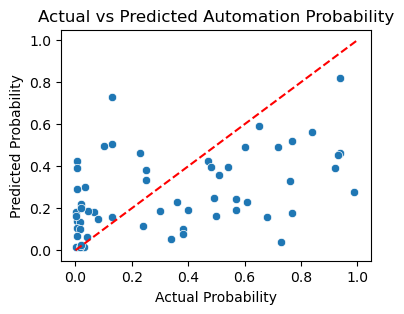

In [134]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Probability")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Automation Probability")
plt.plot([0,1], [0,1], 'r--')  # reference line
plt.show()


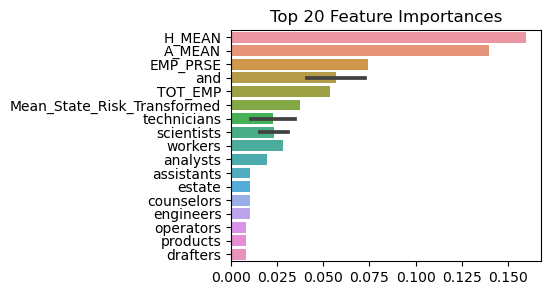

In [135]:
# Use the correct feature names
feat_names = X_train.columns  # must match features used in model

# Feature importances
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(4,3))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 20 Feature Importances")
plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


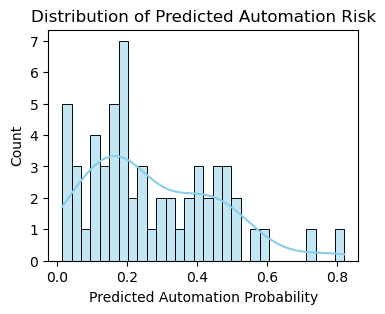

In [136]:
plt.figure(figsize=(4,3))
sns.histplot(y_pred, bins=30, kde=True, color='skyblue')
plt.xlabel("Predicted Automation Probability")
plt.title("Distribution of Predicted Automation Risk")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


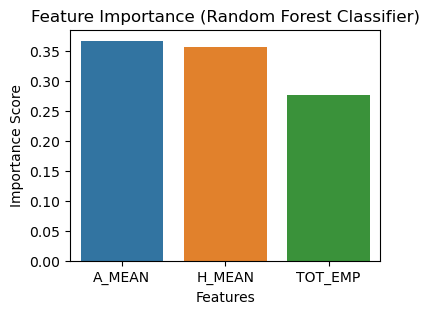

Feature Importances:
A_MEAN: 0.3669
H_MEAN: 0.3566
TOT_EMP: 0.2765


In [137]:


# Selecting features
features = ['A_MEAN', 'H_MEAN', 'TOT_EMP']
X = merged_df[features]
y = merged_df['risk_category']

# Fit model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Plot importance
importances = rf.feature_importances_
plt.figure(figsize=(4,3))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance (Random Forest Classifier)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

print("Feature Importances:")
for f, s in zip(features, importances):
    print(f"{f}: {round(s,4)}")


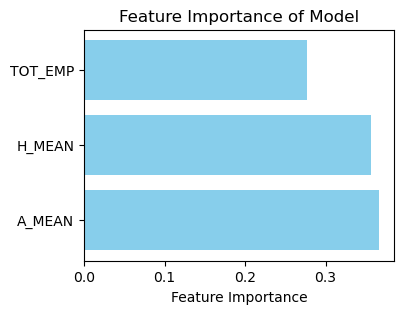

In [138]:


importances = {'A_MEAN': 0.3669, 'H_MEAN': 0.3566, 'TOT_EMP': 0.2765}
features = list(importances.keys())
values = list(importances.values())

plt.figure(figsize=(4,3))
plt.barh(features, values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Model')
plt.show()


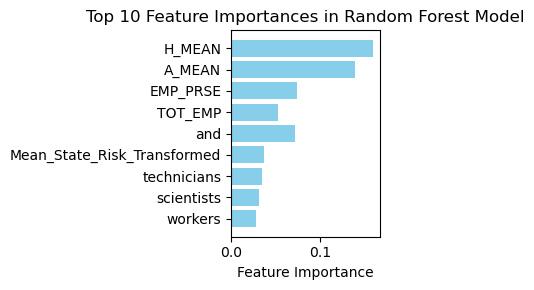

In [139]:
# Assume model.feature_importances_ corresponds to X_final_encoded columns
importances = model.feature_importances_
feature_names = X_final_encoded.columns

# Create a DataFrame for convenience
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot
plt.figure(figsize=(4,3))
plt.barh(feat_imp_df['Feature'][::-1], feat_imp_df['Importance'][::-1], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.tight_layout()
plt.show()


In [140]:



model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=4,
    min_samples_split=6,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse_scores = cross_val_score(
    model, X_final_encoded, y_final, scoring="neg_mean_squared_error", cv=kf
)
rmse_scores = (-neg_mse_scores) ** 0.5

print("CV RMSE per fold:", rmse_scores)
print("Mean CV RMSE:", rmse_scores.mean())
print("Std CV RMSE:", rmse_scores.std())


CV RMSE per fold: [0.30124458 0.297857   0.34717187 0.26862745 0.32185378]
Mean CV RMSE: 0.3073509348289467
Std CV RMSE: 0.026164747876556572


In [141]:
model.fit(X_final_encoded, y_final)
importances = model.feature_importances_
feat_imp = sorted(zip(feature_names, importances), key=lambda t: t[1], reverse=True)[:15]
for name, score in feat_imp:
    print(f"{name}: {score:.4f}")

A_MEAN: 0.1844
H_MEAN: 0.1804
and: 0.0745
Mean_State_Risk_Transformed: 0.0692
technicians: 0.0650
TOT_EMP: 0.0516
EMP_PRSE: 0.0475
and: 0.0284
engineers: 0.0225
scientists: 0.0210
engineers: 0.0186
workers: 0.0166
managers: 0.0147
medical: 0.0135
technicians: 0.0089
